1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [95]:
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P ./data

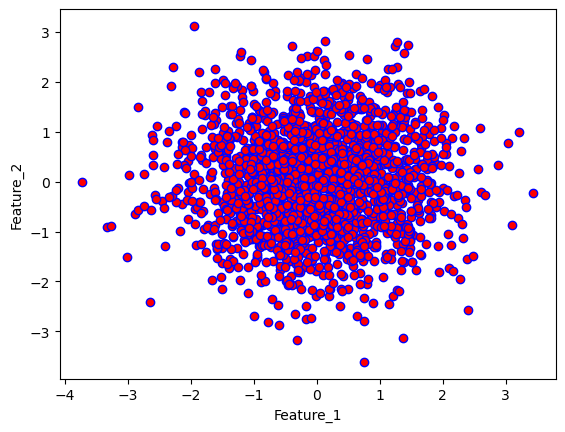

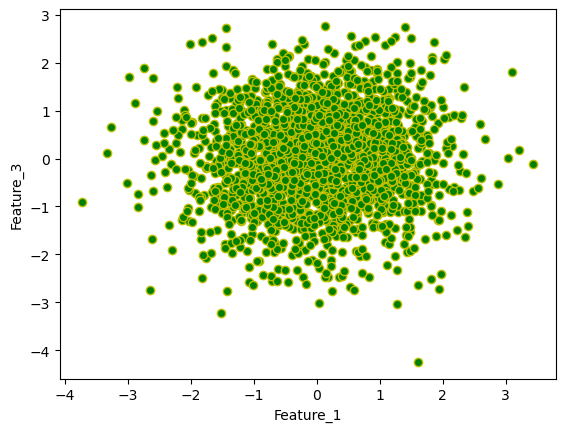

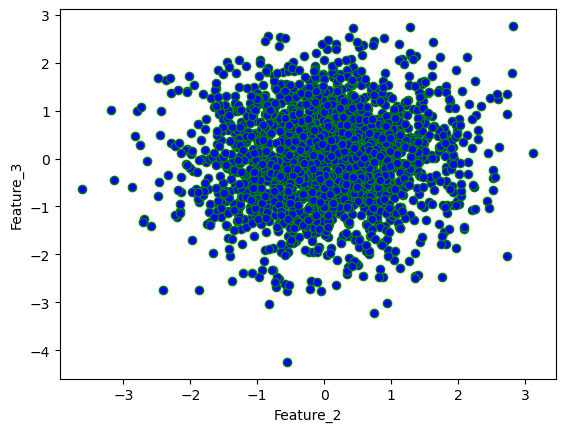

Since they are disposed in a random way and there are no patterns in the plots, the features are not correlated.


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/regression_generated.csv")
#print(data[0:10])

f_1 = data.iloc[:,1]
f_2 = data.iloc[:,2]
f_3 = data.iloc[:,3]

plt.scatter(x=f_1, y=f_2, marker='o', c='r', edgecolor='b')
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.show()

plt.scatter(x=f_1, y=f_3, marker='o', c='g', edgecolor='y')
plt.xlabel("Feature_1")
plt.ylabel("Feature_3")
plt.show()

plt.scatter(x=f_2, y=f_3, marker='o', c='b', edgecolor='g')
plt.xlabel("Feature_2")
plt.ylabel("Feature_3")
plt.show()

print("Since they are disposed in a random way and there are no patterns in the plots, the features are not correlated.")

# ALMOST DONE

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

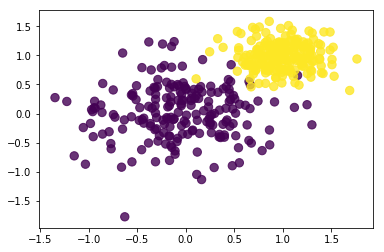

In [97]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

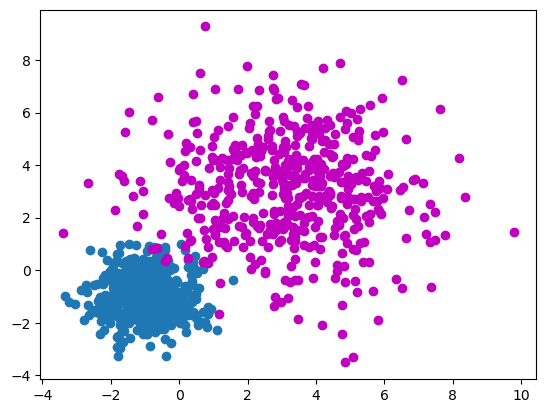

In [98]:
d1 = 2
d2 = 500
first_2d = (0.8*np.random.randn(d1,d2))-1
second_2d = (2*np.random.randn(d1,d2))+3
plt.subplot()
plt.scatter(x=first_2d[0,:], y= first_2d[1,:])
plt.scatter(x=second_2d[0,:], y= second_2d[1,:], c='m')

# ALMOST DONE, SI PUOÌ AGGIUNGERE LA LEGENDA

# 3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [99]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [100]:
import pickle

with open('data/residuals_261.pkl', 'rb') as f:
    residuals = pickle.load(f)

residuals

array({'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])},
      dtype=object)

In [101]:
res_data = pd.DataFrame(residuals.item())
clean_data = res_data[abs(res_data['residuals']) < 2] # alternative: query
clean_data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Observing the scatter plot, we can say that the two variables are only weakly correlated.


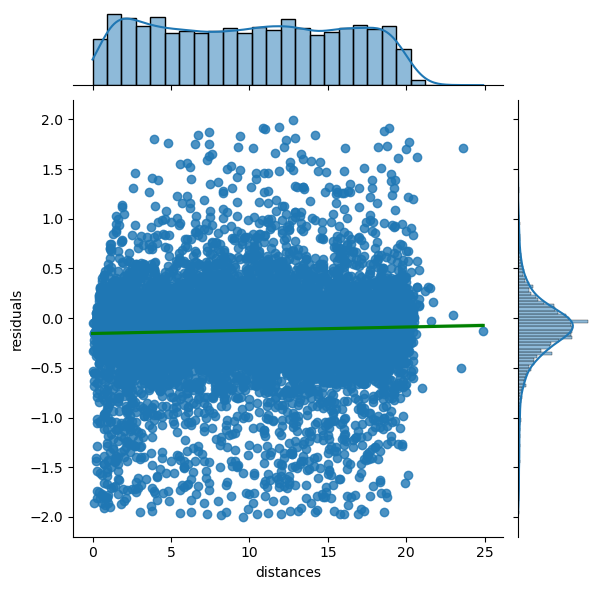

In [102]:
import seaborn as sns

sns.jointplot(data = clean_data, x = 'distances', y = 'residuals', kind = 'reg', line_kws={"color" : "green"})

print("Observing the scatter plot, we can say that the two variables are only weakly correlated.")

Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.

Text(0.5, 1.0, 'Histogram for the distance')

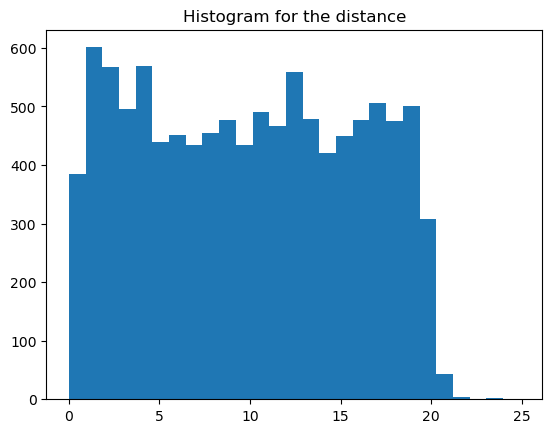

In [103]:
plt.figure()
n, bins, patch = plt.hist(x = clean_data['distances'], bins = 27)
x_bins = (bins[1:]+bins[0:-1])/2
plt.title("Histogram for the distance")

Obtain 3 numpy arrays:
- x, the array of bin centers of the profile histogram of the "distance" variable
- y, the mean values of the "residuals", estimated in slices (bins) of "distance"
- err_y, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
Plot the profile plot on top of the scatter plot

Text(0, 0.5, 'Residuals')

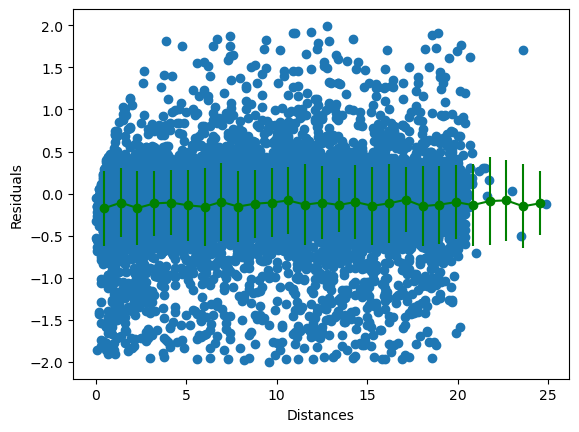

In [104]:
n_bins = 27 # we decide to divide our data into 27 bins
binLen = 1/n_bins*25
binCenter = binLen/2
bin_array = np.array([(i*binLen)+binCenter for i in range(0, 28)])
x_space = np.linspace(0, 25, 28)
# x: bin centers
x = (x_space[1:] + x_space[0:-1])/2 # take the mean point between element i and i+1

X = clean_data['residuals']
step = int(clean_data.shape[0]/n_bins)
# X_mean: mean values of the residuals
X_mean = np.array([X[i:i+step].mean() for i in range(0,X.shape[0]-step, step)])

# X_std_dev: standard deviation of the residuals
X_std_dev = np.array([X[i:i+step].std() for i in range(0, X.shape[0]-step, step)])

plt.figure()
plt.scatter(x = clean_data['distances'], y = clean_data['residuals'])
plt.errorbar(x = x, y = X_mean, yerr = X_std_dev, marker = 'o', color = 'g')
plt.xlabel("Distances")
plt.ylabel("Residuals")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


[ 6.  5.  8. 11. 18. 17.  9.  9.  4.  3.]


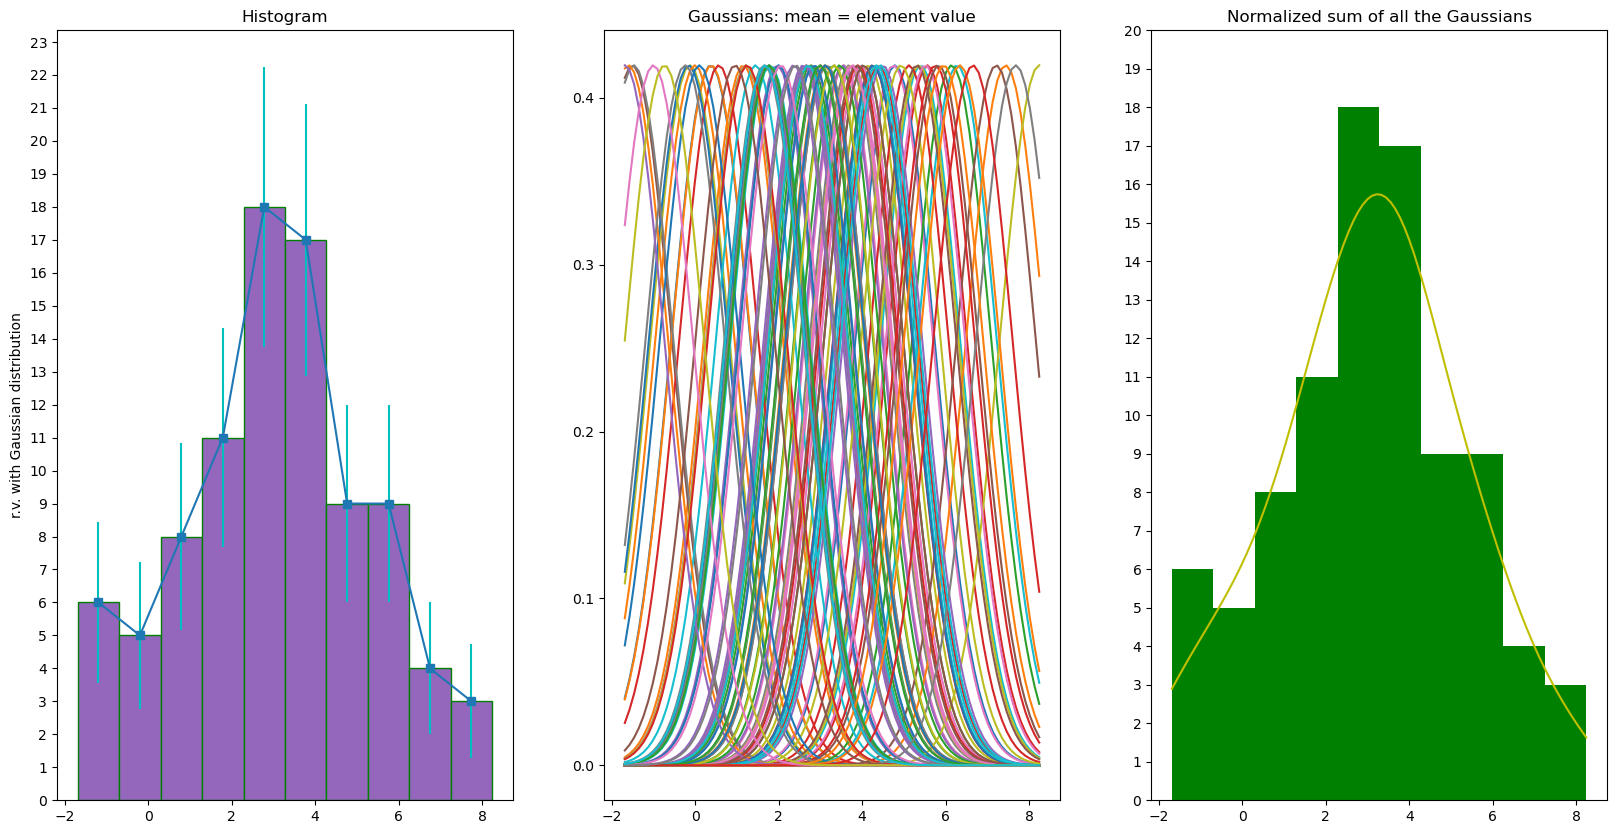

In [106]:
from scipy.stats import norm
from scipy.integrate import trapz
import random

random.seed(0)

N = 90
mu, sigma = 3, 2 # mean and standard deviation
x = mu + (np.random.randn(N)*sigma) # numpy array with N elements

# subplots with three graphs
fig, (ax_1, ax_2, ax_3)= plt.subplots(nrows=1, ncols=3, figsize = (20,10))

# histogram
n, bins, patches = ax_1.hist(x = x, bins = 10, edgecolor = 'g', color = 'tab:purple')
print(n)
ax_1.set_ylabel('r.v. with Gaussian distribution')
ax_1.set_title("Histogram")
ax = fig.axes[0]
y_ticks_1 = ax_1.yaxis.set_ticks(np.arange(0, N, 1))

pois_uncert = np.sqrt(n)
binCenter =(bins[:-1] + bins[1:])/2
ax_1.errorbar(x = binCenter, y = n, yerr = pois_uncert, ecolor='c', marker= 's')

# Gaussians
std_default = 1.06 * x.std() * (x.size**(-1/5))
x_space = np.linspace(np.min(x), np.max(x), N)
y = []
group_gauss = []
for i in range(0, len(x)):
    y.append(np.random.randn()*std_default + x[i])
    single_gauss = norm.pdf(x_space, x[i], scale = std_default)
    group_gauss.append(single_gauss)
    ax_2.plot(x_space, single_gauss)
ax_2.set_title("Gaussians: mean = element value")
    
# Normalized sum of all the Gaussians
gauss_area = trapz(np.sum(group_gauss, axis = 0), x_space)
hist_area = sum([(bins[i+1]-bins[i])*n[i] for i in range(0, len(n)-1)])
int_ratio = abs(gauss_area/hist_area)
normalized_gauss = np.sum(group_gauss, axis = 0)/int_ratio

ax_3.plot(x_space, normalized_gauss, color = 'y')
ax_3.hist(x, bins = 10, color = 'g')
y_ticks_3 = ax_3.yaxis.set_ticks(np.arange(0, 21, 1))
title_3 = ax_3.set_title("Normalized sum of all the Gaussians")